# Back to the basics

In [11]:
%matplotlib inline

In [12]:
from xarrayutils.plotting import shaded_line_plot

In [15]:
from xarrayutils.plotting import linear_piecewise_scale

In [1]:
import pathlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'
xr.set_options(cmap_sequential='cividis', display_style='html', keep_attrs=True)
import cmocean.cm as cmo

#dask.config.set({"array.slicing.split_large_chunks": True}) # avoid large chunks to be created.
from cmip6_preprocessing.utils import cmip6_dataset_id
import matplotlib.pyplot as plt
from busecke_etal_2021_aguadv.plotting import o2_model_colors, model_color_legend
from cmip6_preprocessing.postprocessing import concat_members
import cf_xarray
from cmip6_omz.utils import o2_models

In [2]:
def convert_to_cumulative_volume(hist):
    # why on earth would this remove the coordinates?
    hist_cumu = hist.cumsum("o2_bin")
    hist_cumu = hist_cumu.assign_coords(o2_bin=hist.o2_bin)
    return hist_cumu

## Notes

- There is something super funky about some of the data. When I try to load at the beginning, it crashes the kernel?
    - The plotting works, but concatting the members doesnt (I assume something with the coordinates is broken?\)

In [3]:
ofolder = pathlib.Path(
    "../../cmip6_omz/data/processed/full_volume_pac/"
)
flist = list(ofolder.glob('*.zarr'))
results = {}
for f in flist:

    ds = xr.open_zarr(
        f, consolidated=True, use_cftime=True
    )
    # some fiddling is needed here (i messed up the coordinates
    if 'lev_bounds' in ds.coords:                              
        lev_vertices = cf_xarray.bounds_to_vertices(ds.lev_bounds, 'bnds').load()
        dz = lev_vertices.diff('lev_vertices')
        ds = ds.assign_coords(dz=('lev', dz.data))

    else:
        print(f'Need to reprocess: {f}')
        dz = ds.dz.reset_coords(drop=True)
        if 'time' in dz.dims:
            dz = dz.isel(time=0)
        if 'x' in dz.dims:
            dz = dz.max(['x','y'])
        dz = dz.load().drop([di for di in ['x', 'y', 'time'] if di in dz.coords])
        ds = ds.reset_coords(drop=True).assign_coords(dz=dz).load()
        ds = ds.drop([di for di in ['x', 'y'] if di in ds.dims])
    results[f.stem] = ds

Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.NCC.NorESM2-LM.none.r1i1p1f1.Omon.gr.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r10i1p1f1.Omon.gn.v20190429_r10i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r10i1p2f1.Omon.gn.v20190429_r10i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r3i1p1f1.Omon.gn.v20190429_r3i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r7i1p1f1.Omon.gn.v20190429_r7i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MOHC.UKESM1-0-LL.none.r2i1p1f2.Omon.gn.none_r2i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r1i1p2f1.Omon.gn.v20190429_r1i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r3i1p1f1.Omon.gn.none_r3i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CNRM-CERFACS.CNRM-ESM2-1.none.r3i1p1f2.Omon.gn.none_r3i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r9i1p1f1.Omon.gn.v20190429_r9i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MRI.MRI-ESM2-0.none.r1i2p1f1.Omon.gn.none_r1i2p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r6i1p1f1.Omon.gn.none_r6i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.none.MPI-ESM1-2-HR.none.r1i1p1f1.Omon.gn.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r9i1p2f1.Omon.gn.v20190429_r9i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r5i1p1f1.Omon.gn.none_r5i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r8i1p2f1.Omon.gn.v20190429_r8i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r2i1p1f1.Omon.gn.none_r2i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r4i1p1f1.Omon.gn.none_r4i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5-CanOE.none.r2i1p2f1.Omon.gn.v20190429_r2i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r7i1p2f1.Omon.gn.v20190429_r7i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CNRM-CERFACS.CNRM-ESM2-1.none.r2i1p1f2.Omon.gn.none_r2i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r5i1p1f1.Omon.gn.v20190429_r5i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r3i1p2f1.Omon.gn.v20190429_r3i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MOHC.UKESM1-0-LL.none.r8i1p1f2.Omon.gn.none_r8i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r6i1p2f1.Omon.gn.v20190429_r6i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r1i1p1f1.Omon.gn.v20190429_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.NOAA-GFDL.GFDL-ESM4.none.r1i1p1f1.Omon.gr.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r2i1p2f1.Omon.gn.v20190429_r2i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CNRM-CERFACS.CNRM-ESM2-1.none.r1i1p1f2.Omon.gn.none_r1i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r1i1p1f1.Omon.gn.none_r1i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r9i1p1f1.Omon.gn.none_r9i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r8i1p1f1.Omon.gn.v20190429_r8i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r2i1p1f1.Omon.gn.none_r2i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CNRM-CERFACS.CNRM-ESM2-1.none.r5i1p1f2.Omon.gn.none_r5i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r10i1p1f1.Omon.gn.none_r10i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r7i1p1f1.Omon.gn.none_r7i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CNRM-CERFACS.CNRM-ESM2-1.none.r4i1p1f2.Omon.gn.none_r4i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MOHC.UKESM1-0-LL.none.r4i1p1f2.Omon.gn.none_r4i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MOHC.UKESM1-0-LL.none.r3i1p1f2.Omon.gn.none_r3i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r3i1p1f1.Omon.gn.none_r3i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r5i1p2f1.Omon.gn.v20190429_r5i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r6i1p1f1.Omon.gn.none_r6i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r1i1p1f1.Omon.gn.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r4i1p1f1.Omon.gn.none_r4i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MPI-M.MPI-ESM1-2-LR.none.r8i1p1f1.Omon.gn.none_r8i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MIROC.MIROC-ES2L.none.r1i1p1f2.Omon.gn.none_r1i1p1f2.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.NOAA-GFDL.GFDL-CM4.none.r1i1p1f1.Omon.gr.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.MOHC.UKESM1-0-LL.none.r1i1p1f2.Omon.gn.none_r1i1p1f2.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.NCC.NorESM2-MM.none.r1i1p1f1.Omon.gr.none_r1i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5-CanOE.none.r3i1p2f1.Omon.gn.v20190429_r3i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.IPSL.IPSL-CM6A-LR.none.r14i1p1f1.Omon.gn.none_r14i1p1f1.zarr


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r6i1p1f1.Omon.gn.v20190429_r6i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r4i1p1f1.Omon.gn.v20190429_r4i1p1f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r4i1p2f1.Omon.gn.v20190429_r4i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5-CanOE.none.r1i1p2f1.Omon.gn.v20190429_r1i1p2f1.zarr
Need to reprocess: ../../cmip6_omz/data/processed/full_volume_pac/none.CCCma.CanESM5.none.r2i1p1f1.Omon.gn.v20190429_r2i1p1f1.zarr


In [5]:
results = concat_members(results)

/home/jbusecke/code/cmip6_preprocessing/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['experiment_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(


In [6]:
results.keys()

dict_keys(['NorESM2-LM.gr.Omon.o2', 'CanESM5.gn.Omon.o2', 'UKESM1-0-LL.gn.Omon.o2', 'MPI-ESM1-2-LR.gn.Omon.o2', 'CNRM-ESM2-1.gn.Omon.o2', 'MRI-ESM2-0.gn.Omon.o2', 'IPSL-CM6A-LR.gn.Omon.o2', 'MPI-ESM1-2-HR.gn.Omon.o2', 'ACCESS-ESM1-5.gn.Omon.o2', 'CanESM5-CanOE.gn.Omon.o2', 'GFDL-ESM4.gr.Omon.o2', 'MIROC-ES2L.gn.Omon.o2', 'GFDL-CM4.gr.Omon.o2', 'NorESM2-MM.gr.Omon.o2'])

In [7]:
missing_models = set(o2_models())-set(np.unique([ds.source_id for ds in results.values()]))
missing_models

{'MPI-ESM-1-2-HAM', 'NorCPM1', 'NorESM1-F'}

In [8]:
colors = o2_model_colors()

# Basic OMZ z coordinate plots

Text(0, 0.5, 'Total OMZ Volume [m^3]')

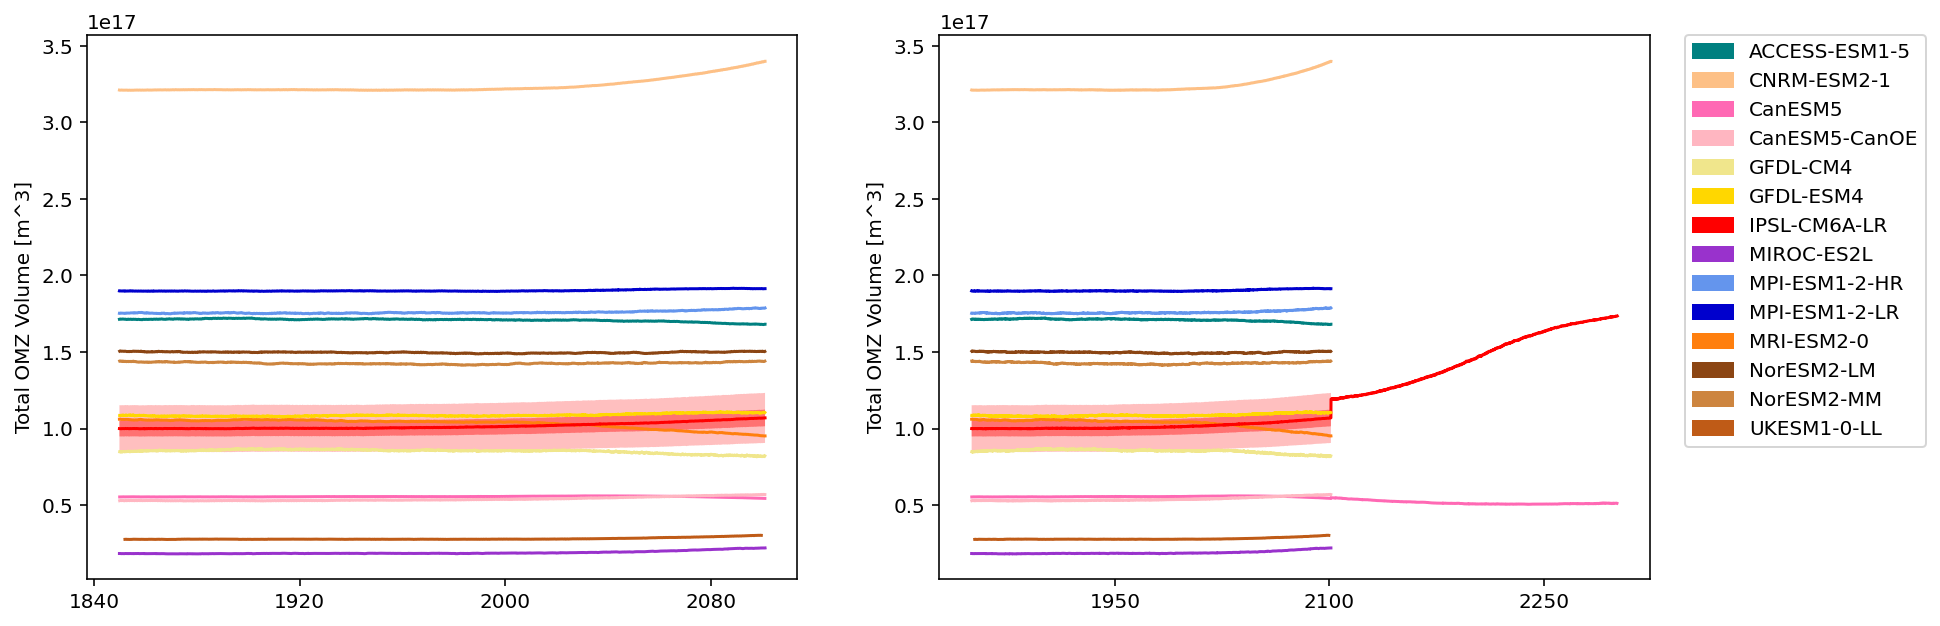

In [19]:
plt.figure(figsize=[14, 5])
plt.subplot(1,2,1)
for name, ds in results.items():
    vol = convert_to_cumulative_volume(ds).omz_volume.sel(o2_bin=80).sum('lev')
    vol = vol.where(vol>0)
    vol = vol.sel(time=slice('1850', '2100'))
    shaded_line_plot(vol, 'member_id', line_kwargs=dict(color=colors[ds.source_id])) 
plt.ylabel('Total OMZ Volume [m^3]')

plt.subplot(1,2,2)
for name, ds in results.items():
    vol = convert_to_cumulative_volume(ds).omz_volume.sel(o2_bin=80).sum('lev')
    vol = vol.where(vol>0)
    shaded_line_plot(vol, 'member_id', line_kwargs=dict(color=colors[ds.source_id])) 
model_color_legend()
plt.ylabel('Total OMZ Volume [m^3]')

## Notes
- For the total OMZ, the historical bias is worse than most of the changes by 2100
- Only few models have longer members (IPSL, CanESM5)

## Todo
- Needs observed volume

Text(0, 0.5, 'OMZ volume anomaly [$m^3$]')

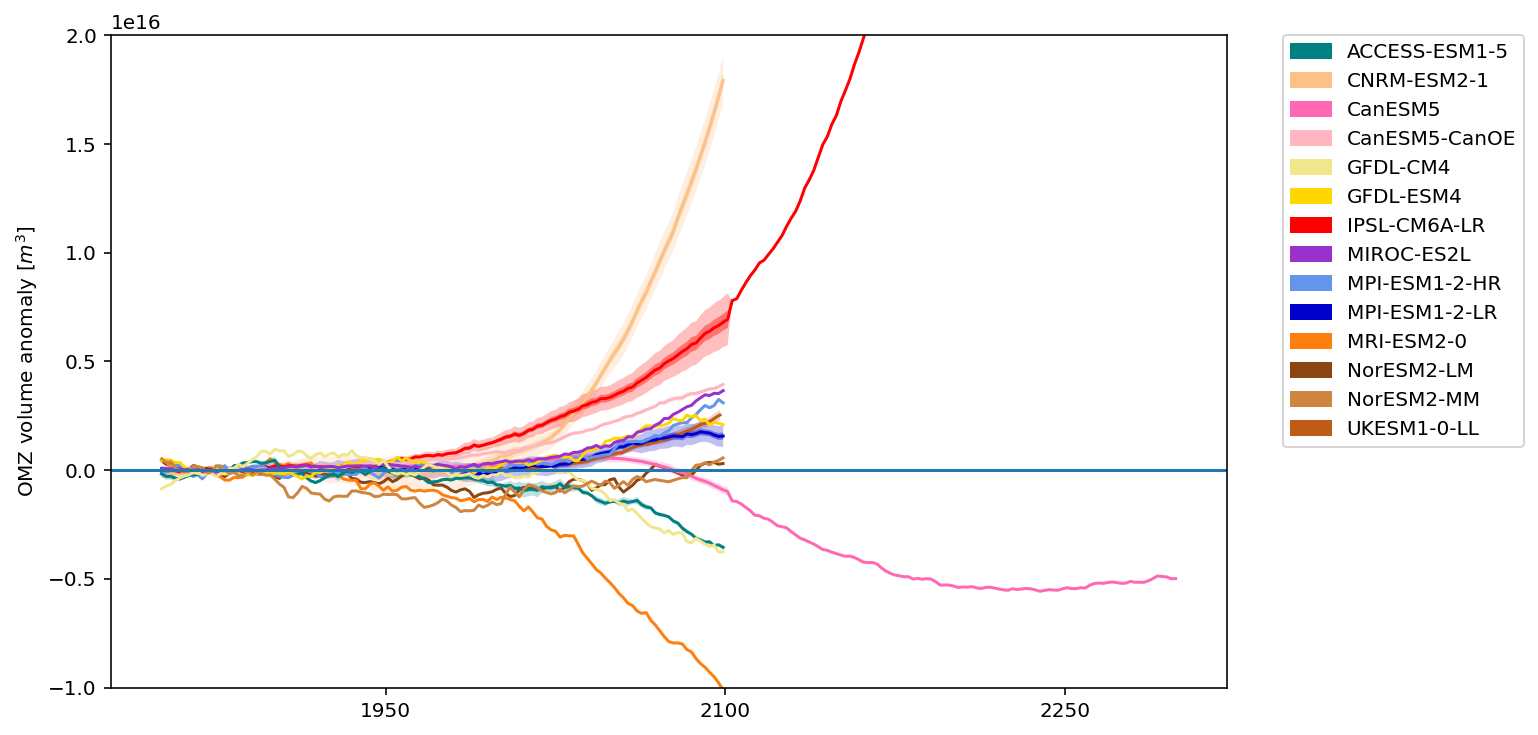

In [14]:
plt.figure(figsize=[10,6])
for name, ds in results.items():
    vol = convert_to_cumulative_volume(ds).omz_volume.sel(o2_bin=80).sum('lev')
    vol = vol.where(vol>0)
    vol_anomaly = vol - vol.sel(time=slice('1850', '1900')).mean('time')
    vol_anomaly = vol_anomaly.coarsen(time=24, boundary='trim').mean('time')
    shaded_line_plot(vol_anomaly, 'member_id', line_kwargs=dict(color=colors[ds.source_id])) 
model_color_legend()
plt.axhline(0)
plt.ylim(np.array([-1,2])*1e16)
plt.ylabel('OMZ volume anomaly [$m^3$]')

## Forced changes in depth coordinates

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scr

Text(0, 0.5, 'OMZ volume change (1850-1900) to (2050-2100) [$m^2$]')

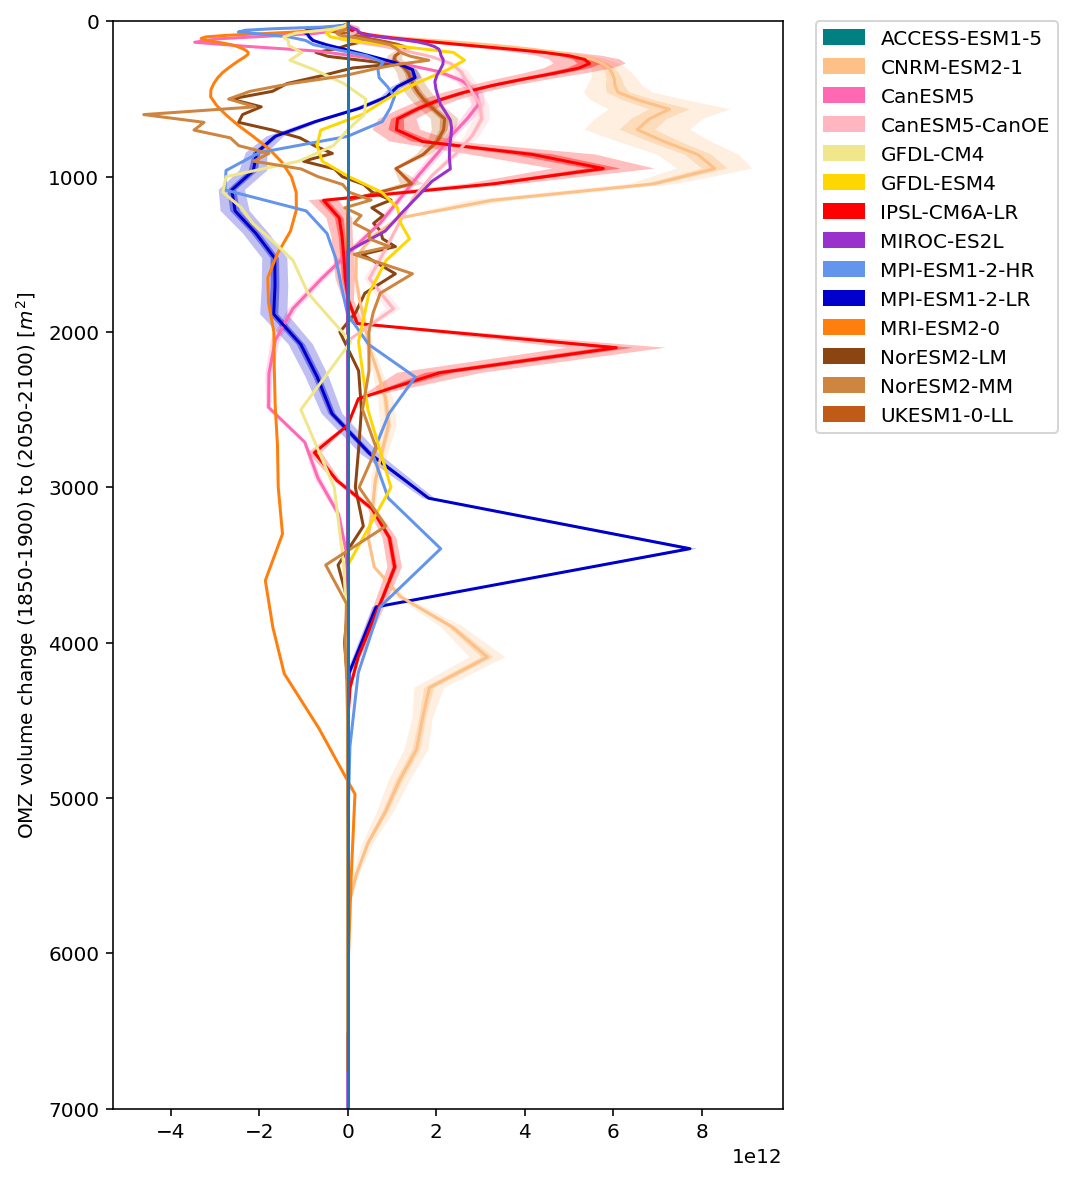

In [22]:
plt.figure(figsize=[6,10])
for name, ds in results.items():
    ds_hist = convert_to_cumulative_volume(ds).omz_volume.sel(time=slice('1850', '1900')).mean('time')
    ds_ssp = convert_to_cumulative_volume(ds).omz_volume.sel(time=slice('2050', '2100')).mean('time')

    out = ((ds_ssp - ds_hist)/ds.dz)
    
    shaded_line_plot(out.sel(o2_bin=80), 'member_id', line_kwargs=dict(color=colors[ds.source_id]), horizontal=False) 
model_color_legend()
plt.axvline(0)
plt.ylim(7000, 0)
plt.ylabel('OMZ volume change (1850-1900) to (2050-2100) [$m^2$]')

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scr

<AxesSubplot:ylabel='OMZ Area distribution with depth [m^2]'>

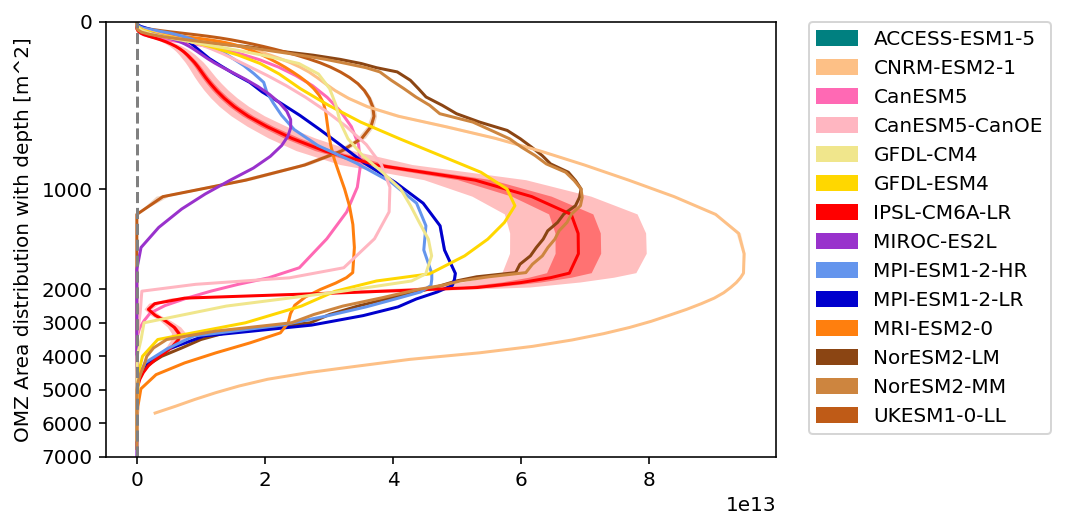

In [128]:
plt.figure()
for name, ds in results.items():
    ds_hist = convert_to_cumulative_volume(ds).omz_volume.sel(time=slice('1850', '1900')).mean('time')

    out = ds_hist/ds.dz
    shaded_line_plot(out.sel(o2_bin=80), 'member_id', line_kwargs=dict(color=colors[ds.source_id]), horizontal=False) 
model_color_legend()
plt.axvline(0, color='0.5', ls='--')
plt.ylim(7000, 0)
plt.ylabel('OMZ Area distribution with depth [m^2]')
linear_piecewise_scale(1500, 4)

## Load the density data

In [129]:
from fastprogress.fastprogress import progress_bar
flist = list(pathlib.Path('../../cmip6_omz/data/temp/julius_temp/fine_density_tests_combined/').absolute().glob('*.zarr'))
ddict_sigma = {}
for f in progress_bar(flist):
    ddict_sigma[f.stem] = xr.open_zarr(f)

In [130]:
from cmip6_omz.upstream_stash import concat_experiments, concat_members
ddict_sigma_combined = concat_experiments(ddict_sigma)

In [131]:
ddict_sigma_final = concat_members(ddict_sigma_combined, match_attr_ignore=['experiment_id'])

In [132]:
ddict_sigma_final.keys()

dict_keys(['GFDL-ESM4.gn.Omon', 'MRI-ESM2-0.gn.Omon', 'IPSL-CM6A-LR.gn.Omon', 'MPI-ESM1-2-HR.gn.Omon', 'MPI-ESM1-2-LR.gn.Omon', 'CanESM5.gn.Omon', 'CNRM-ESM2-1.gn.Omon', 'UKESM1-0-LL.gn.Omon', 'MIROC-ES2L.gn.Omon', 'CanESM5-CanOE.gn.Omon'])

In [138]:
# load obs
obs = xr.open_dataset('/tigress/GEOCLIM/LRGROUP/samjd/global_omz/cmip6_omz/data/density_remapping_obs/woa13_fine_sigma.nc')
obs

<xarray.Dataset>
Dimensions:             (y: 720, x: 1440, sigma_0: 45, o2_bin: 9, bnds: 2)
Coordinates: (12/13)
    crs                 int32 ...
  * y                   (y) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * x                   (x) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    lon                 (x, y) float32 ...
    lat                 (x, y) float32 ...
    areacello           (x, y) float32 ...
    ...                  ...
  * o2_bin              (o2_bin) int64 5 10 20 40 60 80 100 120 140
    climatology_bounds  (bnds) float32 ...
    lev                 (y, x, sigma_0) float64 ...
    dz_t                (y, x, sigma_0) float64 ...
    lev_bounds          (bnds, y, x, sigma_0) float64 ...
    sigma_0_bounds      (bnds, sigma_0) float64 ...
Dimensions without coordinates: bnds
Data variables:
    so                  (y, x, sigma_0) float64 ...
    thetao              (y, x, sigma_0) float64 ...
    o2                  (y, x, sigma_0) float64 ...
    aou                 (y, x, sigma_0) float64 ...
    po4                 (y, x, sigma_0) float64 ...
    no3                 (y, x, sigma_0) float64 ...
    o2sat               (y, x, sigma_0) float64 ...
    omz_thickness       (o2_bin, y, x, sigma_0) float32 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2013 version 2 : sea_w...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, J. I. Antonov...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/WOA13/pr_wo...
    date_created:                    2011-09-28 
    date_modified:                   2011-09-28

In [150]:
from dask.diagnostics import ProgressBar

In [141]:
from cmip6_omz.omz_tools import mask_basin
def mask_trop_pac(ds_in):
    ds_masked = ds_in.where(abs(ds_in.lat) <= 30, drop=False)
    ds_masked = mask_basin(ds_masked, drop=False)
    return ds_masked

In [206]:
import warnings
def sigma_omz_hist(ds):
    ds['omz_vol'] = ds.omz_thickness * ds.areacello
    dsigma = cf_xarray.bounds_to_vertices(ds.sigma_0_bounds, 'bnds').diff('sigma_0_vertices')
    ds = ds.assign_coords(dsigma_0=('sigma_0',dsigma.load().data))
    omz_vol = ds.omz_vol.sel(o2_bin=80)
    omz_vol_pac = mask_trop_pac(omz_vol)
    
    print('full vol')
    print(omz_vol.isel(time=0, member_id=0, missing_dims='ignore').sum().load().data)
    print('pac vol')
    print(omz_vol_pac.isel(time=0, member_id=0, missing_dims='ignore').sum().load().data)

    omz_vol_int = omz_vol_pac.sum(['x','y'])
    if 'time' in ds.dims:
        warnings.warn('This should be selected based on time....')
        omz_vol_hist = omz_vol_int.isel(time=slice(0,50)).mean('time')
    else:
        omz_vol_hist = omz_vol_int
    omz_vol_hist.attrs = ds.attrs
    return omz_vol_hist

In [207]:
colors['WOA']='k'

In [210]:
# prep obs
hist_sigma_vol_profile = {}
for name, ds in ddict_sigma_final.items():
    print(name)
    omz_vol_hist = sigma_omz_hist(ds)
    with ProgressBar():
        omz_vol_hist = omz_vol_hist.load()
    hist_sigma_vol_profile[name] = omz_vol_hist
    
#     shaded_line_plot(omz_vol_hist_norm, 'member_id', line_kwargs=dict(color=colors[ds.source_id]), horizontal=False, ax=ax) 
hist_sigma_vol_profile['WOA'] = sigma_omz_hist(obs).load()
print('DONE')

GFDL-ESM4.gn.Omon
full vol
0.0
pac vol
0.0
[                                        ] | 1% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  2.2s
MRI-ESM2-0.gn.Omon
full vol
1.25959656485872e+17
pac vol
9.945034320572408e+16
[###                                     ] | 8% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.7s
IPSL-CM6A-LR.gn.Omon
full vol
1.598917480971545e+17
pac vol
1.1687210846846262e+17
[#####                                   ] | 14% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.6s
MPI-ESM1-2-HR.gn.Omon
full vol
2.598923589660537e+17
pac vol
1.6865605591985997e+17
[                                        ] | 0% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  1.9s
MPI-ESM1-2-LR.gn.Omon
full vol
2.7099730113463126e+17
pac vol
1.8199622368143594e+17
[#########                               ] | 23% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.4s
CanESM5.gn.Omon
full vol
6.806330126234638e+16
pac vol
5.472813459582246e+16
[###                                     ] | 9% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.7s
CNRM-ESM2-1.gn.Omon
full vol
4.504907965273121e+17
pac vol
3.1242129291908154e+17
[#####                                   ] | 12% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.6s
UKESM1-0-LL.gn.Omon
full vol
5.5841570709027016e+16
pac vol
2.9409757787748892e+16
[######                                  ] | 15% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.7s
MIROC-ES2L.gn.Omon
full vol
3.5109313359385828e+16
pac vol
1.834415532504371e+16
[#######                                 ] | 18% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.5s
CanESM5-CanOE.gn.Omon
full vol
7.869816721435034e+16
pac vol
5.268110634624992e+16
[###                                     ] | 9% Completed |  0.1s

/tmp/ipykernel_19716/87966419.py:16: UserWarning: This should be selected based on time....
  warnings.warn('This should be selected based on time....')


[########################################] | 100% Completed |  0.6s
full vol
1.1661012e+17
pac vol
6.4081496e+16
DONE


MRI-ESM2-0.gn.Omon
IPSL-CM6A-LR.gn.Omon
MPI-ESM1-2-HR.gn.Omon
MPI-ESM1-2-LR.gn.Omon
CanESM5.gn.Omon
CNRM-ESM2-1.gn.Omon
UKESM1-0-LL.gn.Omon
MIROC-ES2L.gn.Omon
CanESM5-CanOE.gn.Omon


<AxesSubplot:title={'center':'crs = -2147483647, o2_bin = 80'}, ylabel='sigma_0'>

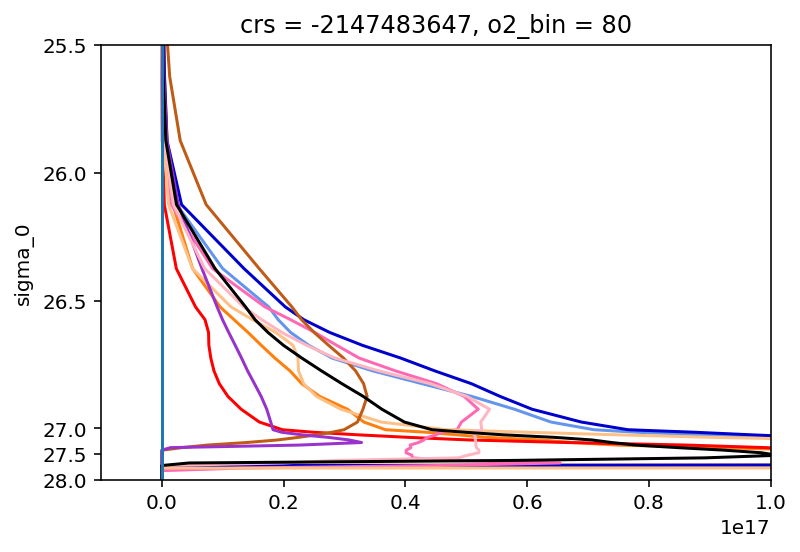

In [237]:
plt.figure()
for name, da in hist_sigma_vol_profile.items():
    if name not in ['GFDL-ESM4.gn.Omon', 'WOA']:
        print(name)
        da = da/da.dsigma_0 # normalize to intensive quantity
        shaded_line_plot(da, 'member_id', line_kwargs=dict(color=colors[da.source_id]), horizontal=False)
        
da_obs = hist_sigma_vol_profile['WOA']
da_obs = da_obs/da_obs.dsigma_0 # normalize to intensive quantity
da_obs.plot(y='sigma_0', color='k')
plt.ylim(28, 25.5)
plt.xlim(np.array([-0.01, 0.1])* 1e18)
plt.axvline(0)
linear_piecewise_scale(27.0, 4)

- quantify how much % the models differ. Is it better than with the depth view?